# Amazon Product Recommendation System


## Section A : Data understanding & cleaning

In [2]:
import pandas as pd

df = pd.read_csv('amazon.csv')
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
print(df.info())
print(df.dtypes)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### converting objects to required data types for analysis


In [58]:
# converting discounted price, actual price to numeric

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False)
df['actual_price'] = df['actual_price'].str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# removing percentage sign from discount percentage
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# removing comma from rating count
df['rating_count'] = df['rating_count'].astype(str).str.replace(',','', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,individual_user_id,individual_review_id,discount_amount,categories,normalized_rating,weighted_ratings,value_for_money_score,simplified_category,engagement_type,combined_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...",700.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,101929.8,0.1709,USBCables,Heavily Reviewed,Wayona Nylon Braided USB to Lightning Fast Cha...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...",150.0,"[Computers&Accessories, Accessories&Peripheral...",0.67,175976.0,0.2362,USBCables,Heavily Reviewed,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...",1700.0,"[Computers&Accessories, Accessories&Peripheral...",0.63,30919.2,0.4719,USBCables,Heavily Reviewed,Sounce Fast Phone Charging Cable & Data Sync U...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...",370.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,396324.6,0.1739,USBCables,Heavily Reviewed,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...",245.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,71001.0,0.4234,USBCables,Heavily Reviewed,Portronics Konnect L 1.2M Fast Charging 3A 8 P...


In [5]:
# no of unique users
# for this firstly we need to split the user id

df['individual_user_id'] = df['user_id'].str.split(',')
all_individual_user_ids = df['individual_user_id'].explode()
total_unique_user_ids = all_individual_user_ids.nunique()

# no of unique products

total_unique_product = df['product_id'].nunique()

#total unique reviews

df['individual_review_id'] = df['review_id'].str.split(',')
all_individual_review_ids = df['individual_review_id'].explode()
total_unique_review_ids = all_individual_review_ids.nunique()



print(f"Total unique users: {total_unique_user_ids}")
print(f"Total unique products: {total_unique_product}")
print(f"Total unique reviews: {total_unique_review_ids}")


Total unique users: 9050
Total unique products: 1351
Total unique reviews: 9269


In [6]:
# top 5 categories by no of product

category_counts = df['category'].value_counts()

top_5_categories = category_counts.head(20)

print(top_5_categories)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons     24
Computers&

In [7]:
df['actual_price'].describe()

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64

In [8]:
df['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [9]:
df['discount_amount'] = df['actual_price'] - df['discounted_price']
df['discount_amount'].describe()

count     1465.000000
mean      2319.679761
std       4604.473790
min          0.000000
25%        371.000000
50%        800.000000
75%       1953.000000
max      61910.000000
Name: discount_amount, dtype: float64

In [10]:
# parsing hierarchical categories into separate label
df['categories'] = df['category'].str.split('|')

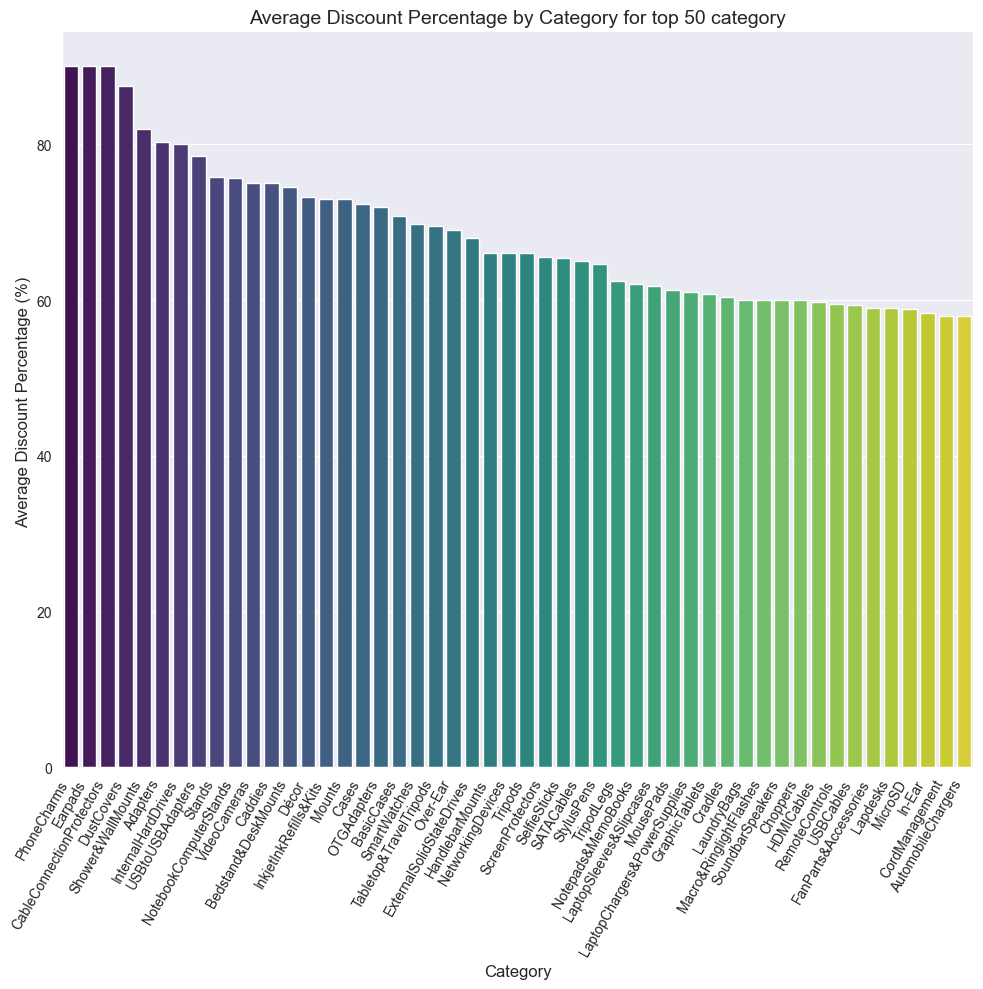

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df['simplified_category'] = df['category'].astype(str).str.split('|').str[-1]

avg_discount_by_category = df.groupby('simplified_category')['discount_percentage'].mean().sort_values(ascending=False)

# plotting only top 50 categories for showing avg discount percentage

plt.figure(figsize=(10,10))
sns.barplot(x=avg_discount_by_category.index[:50], y = avg_discount_by_category.values[:50], hue=avg_discount_by_category.index[:50], palette='viridis')
plt.title('Average Discount Percentage by Category for top 50 category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Discount Percentage (%) ', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [17]:
df[df['rating_count'].isnull()].head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,individual_user_id,individual_review_id,discount_amount,categories,normalized_rating,weighted_ratings,value_for_money_score,simplified_category


- there are two entries where rating count & one entry where rating is null.
- Replacing these null values with mean rating_count/rating of their respective category.

In [18]:
df['rating_count'] = df['rating_count'].fillna(df.groupby('category')['rating_count'].transform('mean'))
df['rating'] = df['rating'].fillna(df.groupby('category')['rating'].transform('mean'))
print(df.isnull().sum())

product_id               0
product_name             0
category                 0
discounted_price         0
actual_price             0
discount_percentage      0
rating                   0
rating_count             0
about_product            0
user_id                  0
user_name                0
review_id                0
review_title             0
review_content           0
img_link                 0
product_link             0
individual_user_id       0
individual_review_id     0
discount_amount          0
categories               0
normalized_rating        0
weighted_ratings         0
value_for_money_score    0
simplified_category      0
dtype: int64


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
epsilon = 1e-6 # A very small number to prevent division by zero

df['discount_amount'].info() # discount_amount is price difference
df['normalized_rating'] = scaler.fit_transform(df[['rating']]).round(decimals=2)
df['weighted_ratings'] =  (df['rating'] * df['rating_count']).round(decimals=2)
df['value_for_money_score'] = ((df['rating'] + df['discount_percentage']) / (df['discounted_price'] + epsilon)).round(decimals=4)
df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1465 entries, 0 to 1464
Series name: discount_amount
Non-Null Count  Dtype  
--------------  -----  
1465 non-null   float64
dtypes: float64(1)
memory usage: 11.6 KB


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,individual_user_id,individual_review_id,discount_amount,categories,normalized_rating,weighted_ratings,value_for_money_score,simplified_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...",700.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,101929.8,0.1709,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...",150.0,"[Computers&Accessories, Accessories&Peripheral...",0.67,175976.0,0.2362,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...",1700.0,"[Computers&Accessories, Accessories&Peripheral...",0.63,30919.2,0.4719,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...",370.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,396324.6,0.1739,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...",245.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,71001.0,0.4234,USBCables


### Section B: Exploratory Data Analysis


Top 10 Categories by Number of Products:
 simplified_category
USBCables           233
SmartWatches         76
Smartphones          68
SmartTelevisions     63
In-Ear               52
RemoteControls       49
MixerGrinders        27
HDMICables           24
DryIrons             24
Mice                 24
Name: count, dtype: int64


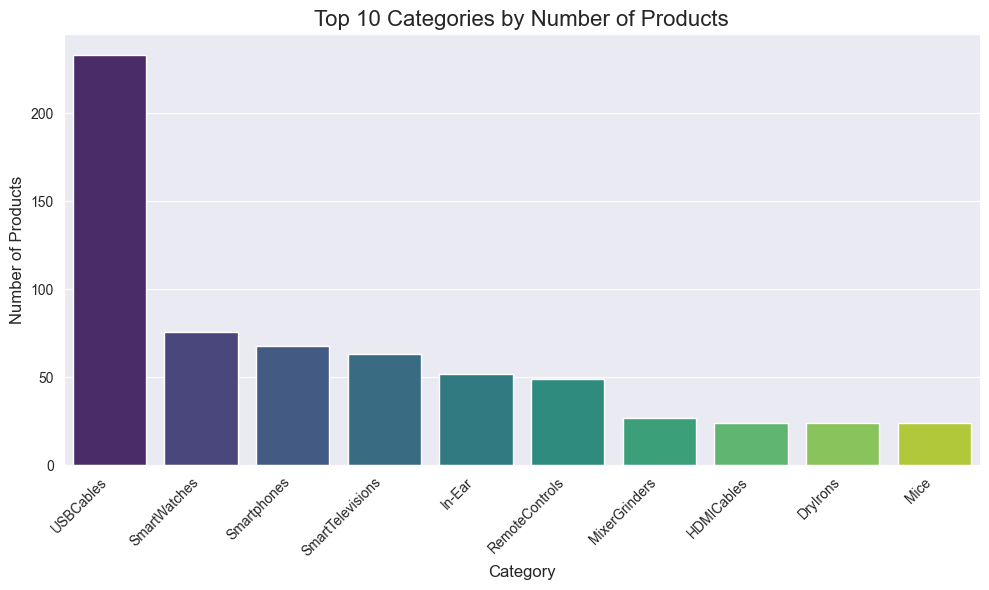

In [20]:
category_counts = df['simplified_category'].value_counts() #Simplified category are lowermost category name in the hierarchy
top_10_categories = category_counts.head(10)

print("Top 10 Categories by Number of Products:\n", top_10_categories)

plt.figure(figsize=(10, 6)) # Set the figure size for better readability
sns.barplot(x=top_10_categories.index, y=top_10_categories.values,hue=top_10_categories.index, palette='viridis')

plt.title('Top 10 Categories by Number of Products', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

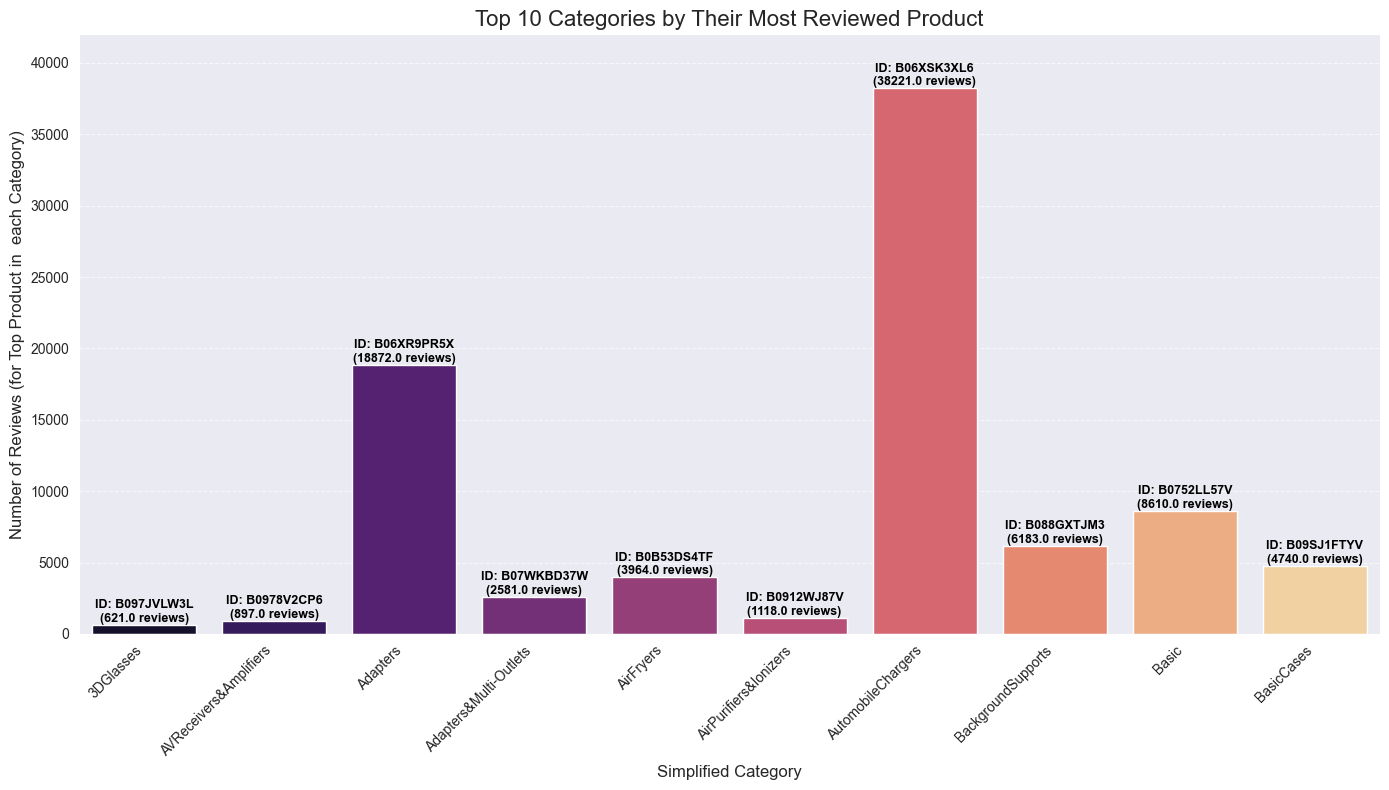

In [22]:
df_sorted = df.sort_values(by=['simplified_category', 'rating_count'], ascending=[True, False])
# top-rated product from each category
# Drop duplicates based on 'simplified_category', keeping the first (which is the highest review_count due to sorting)
most_reviewed_product_per_category = df_sorted.drop_duplicates(subset=['simplified_category'], keep='first')

# Sort the resulting products by their 'review_count' for better visualization (highest first)
top_10_most_reviewed_products_per_category = most_reviewed_product_per_category.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    x = top_10_most_reviewed_products_per_category['simplified_category'],
    y = top_10_most_reviewed_products_per_category['rating_count'],
    hue = top_10_most_reviewed_products_per_category['simplified_category'],
    palette = 'magma'
)

# Add annotations (product_id and review_count) on the bars
for index, row in top_10_most_reviewed_products_per_category.reset_index(drop=True).iterrows(): # Reset index for consistent iteration
    plt.text(
        index,
        row['rating_count'],
        f"ID: {row['product_id']}\n({row['rating_count']} reviews)",
        color = 'black',
        ha = "center", # Horizontal alignment
        va = "bottom", # Vertical alignment
        fontsize = 9,
        weight = 'bold' # Make text a bit bolder
    )

plt.title(f'Top 10 Categories by Their Most Reviewed Product', fontsize=16)
plt.xlabel('Simplified Category', fontsize=12)
plt.ylabel('Number of Reviews (for Top Product in  each Category)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.ylim(0,42000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Average Rating per Simplified Category (Sorted):

simplified_category
Tablets                            4.600000
Film                               4.500000
Memory                             4.500000
SmallApplianceParts&Accessories    4.500000
StreamingClients                   4.500000
CordManagement                     4.500000
SurgeProtectors                    4.500000
PowerLANAdapters                   4.500000
CoffeePresses                      4.500000
PaintingMaterials                  4.500000
Basic                              4.500000
AirFryers                          4.460000
Scientific                         4.450000
Paints                             4.433333
DisposableBatteries                4.414286
CompleteTripodUnits                4.400000
SpeakerCables                      4.400000
ExternalSolidStateDrives           4.400000
SmallKitchenAppliances             4.400000
Financial&Business                 4.400000
Name: rating, dtype: float64


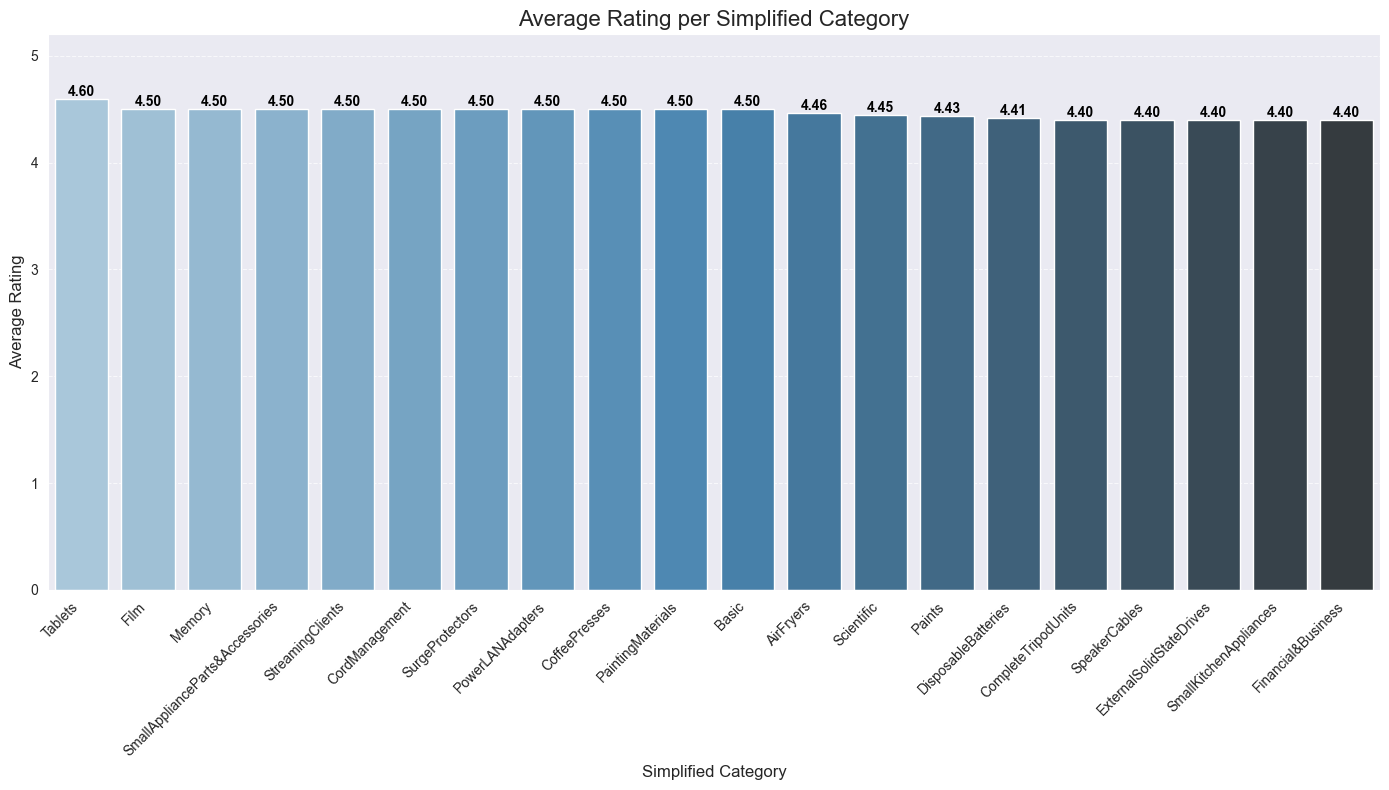

In [23]:
#Average rating per category

average_ratings = df.groupby('simplified_category')['rating'].mean()

average_ratings_sorted = average_ratings.sort_values(ascending=False).head(20)

print("\nAverage Rating per Simplified Category (Sorted):\n")
print(average_ratings_sorted)

plt.figure(figsize=(14, 8)) # Set the figure size for better readability

sns.barplot(
    x=average_ratings_sorted.index,
    y=average_ratings_sorted.values,
    hue=average_ratings_sorted.index,
    palette='Blues_d'
)

# Add annotations (average rating value) on the bars
for index, value in enumerate(average_ratings_sorted.values):
    plt.text(
        index,
        value,
        f"{value:.2f}",
        color='black',
        ha="center",
        va="bottom",
        fontsize=10,
        weight='bold'
    )


plt.title('Average Rating per Simplified Category', fontsize=16)
plt.xlabel('Simplified Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.ylim(0, 5.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Pearson Correlation between Actual Price and Discount price: 0.962


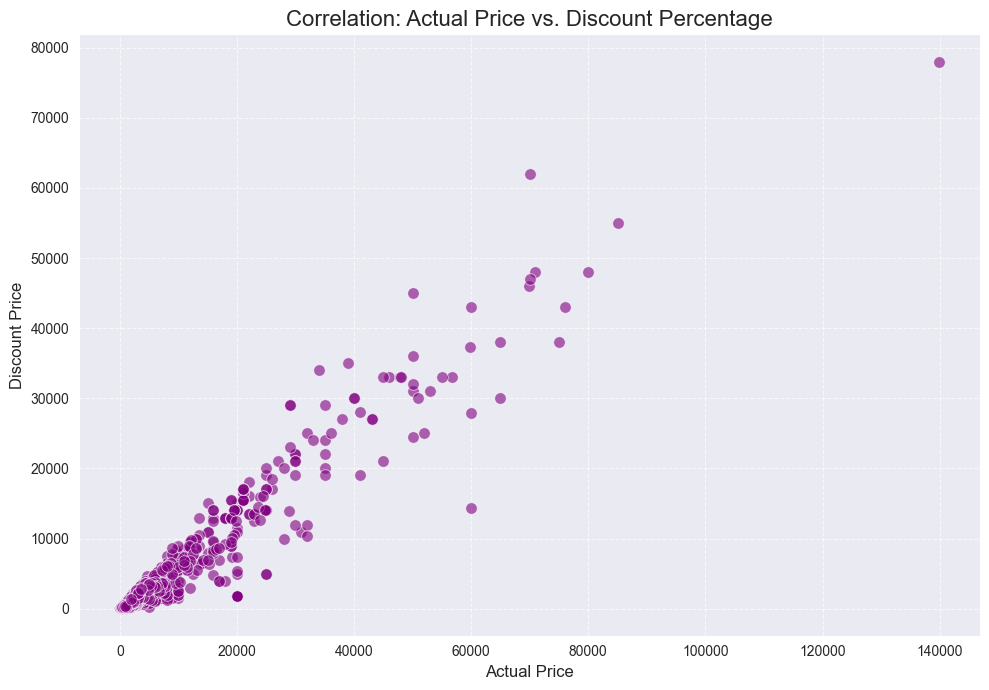


Interpretation of Correlation:
There is a strong positive correlation: Higher actual prices tend to have higher discounts.


In [24]:
# 1. Calculate the Pearson correlation coefficient
# The correlation between actual_price and discount_price
correlation = df['actual_price'].corr(df['discounted_price'])

print(f"Pearson Correlation between Actual Price and Discount price: {correlation:.3f}")

# 2. Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 7)) # Set the figure size

sns.scatterplot(
    x=df['actual_price'],
    y=df['discounted_price'],
    alpha=0.6, # Make points slightly transparent for better visualization of dense areas
    edgecolor='w', # White edge around points
    s=70, # Size of the points
    color='purple' # Color of the points
)

plt.title('Correlation: Actual Price vs. Discount Percentage', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Discount Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for easier reading
plt.tight_layout() # Adjust layout
plt.show()

# 3. Interpretation of correlation
print("\nInterpretation of Correlation:")
if correlation > 0.5:
    print("There is a strong positive correlation: Higher actual prices tend to have higher discounts.")
elif correlation > 0.1:
    print("There is a weak positive correlation: Higher actual prices show a slight tendency for higher discounts.")
elif correlation < -0.5:
    print("There is a strong negative correlation: Higher actual prices tend to have lower discounts.")
elif correlation < -0.1:
    print("There is a weak negative correlation: Higher actual prices show a slight tendency for lower discounts.")
else:
    print("There is a very weak or no linear correlation between actual price and discount percentage.")



#### User Engagement insights


Products with 'low review count' are defined as having less than 1191 reviews (25th percentile).


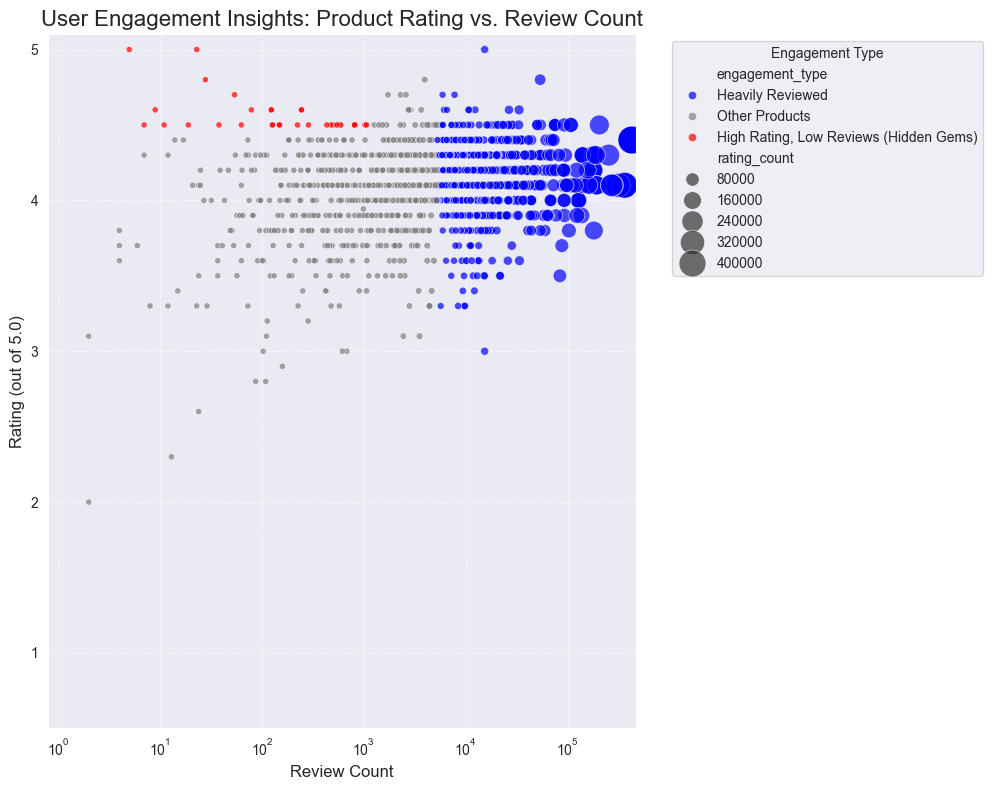


Pearson Correlation between Rating and Review Count: 0.102

Interpretation:
There is a weak positive correlation: Products with higher ratings show a slight tendency to be more heavily reviewed.

Average Rating for Highly Reviewed Products (>= overall median 5179 reviews): 4.15
Average Rating for Less Reviewed Products (< overall median 5179 reviews): 4.05
On average, highly reviewed products tend to have slightly higher ratings.


In [25]:
high_rating_threshold = 4.5 # Products rated 4.5 out of 5 or higher
# Define 'low review count' as less than the 25th percentile of all review counts
low_review_count_threshold = df['rating_count'].quantile(0.25)
print(f"Products with 'low review count' are defined as having less than {low_review_count_threshold:.0f} reviews (25th percentile).")

# Creating a new column to categorize products for plotting
def get_engagement_type(row):
    if row['rating'] >= high_rating_threshold and row['rating_count'] < low_review_count_threshold:
        return 'High Rating, Low Reviews (Hidden Gems)'
    elif row['rating_count'] >= df['rating_count'].median(): # Median as proxy for 'heavily reviewed'
        return 'Heavily Reviewed'
    else:
        return 'Other Products'

df['engagement_type'] = df.apply(get_engagement_type, axis=1)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='rating_count',
    y='rating',
    hue='engagement_type', # Color points based on engagement type
    palette={'High Rating, Low Reviews (Hidden Gems)': 'red',
               'Heavily Reviewed': 'blue',
               'Other Products': 'gray'},
    size='rating_count', # Size points by review count for visual weight
    sizes=(20, 400), # Min and max size of points
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title('User Engagement Insights: Product Rating vs. Review Count', fontsize=16)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Rating (out of 5.0)', fontsize=12)
plt.xscale('log') # Use a log scale for review count if distribution is skewed
plt.xlim(0.8, df['rating_count'].max() * 1.1) # Adjust x-axis limits
plt.ylim(0.5, 5.1) # Adjust y-axis limits for better rating visibility

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Engagement Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
plt.show()


# --- 3. Are highly rated products also heavily reviewed? (Quantitative Insight) ---
correlation_rating_vs_review_count = df['rating'].corr(df['rating_count'])

print(f"\nPearson Correlation between Rating and Review Count: {correlation_rating_vs_review_count:.3f}")

print("\nInterpretation:")
if correlation_rating_vs_review_count > 0.5:
    print("There is a strong positive correlation: Products with higher ratings also tend to be heavily reviewed.")
elif correlation_rating_vs_review_count > 0.1:
    print("There is a weak positive correlation: Products with higher ratings show a slight tendency to be more heavily reviewed.")
elif correlation_rating_vs_review_count < -0.5:
    print("There is a strong negative correlation: Products with higher ratings tend to have fewer reviews.")
elif correlation_rating_vs_review_count < -0.1:
    print("There is a weak negative correlation: Products with higher ratings show a slight tendency for fewer reviews.")
else:
    print("There is a very weak or no linear correlation between product rating and review count.")

# Further qualitative insight (Average rating for highly vs less reviewed)
median_review_count_overall = df['rating_count'].median()
highly_reviewed_products = df[df['rating_count'] >= median_review_count_overall]
low_reviewed_products = df[df['rating_count'] < median_review_count_overall]

avg_rating_highly_reviewed = highly_reviewed_products['rating'].mean()
avg_rating_low_reviewed = low_reviewed_products['rating'].mean()

print(f"\nAverage Rating for Highly Reviewed Products (>= overall median {median_review_count_overall:.0f} reviews): {avg_rating_highly_reviewed:.2f}")
print(f"Average Rating for Less Reviewed Products (< overall median {median_review_count_overall:.0f} reviews): {avg_rating_low_reviewed:.2f}")

if avg_rating_highly_reviewed > avg_rating_low_reviewed:
    print("On average, highly reviewed products tend to have slightly higher ratings.")
elif avg_rating_low_reviewed > avg_rating_highly_reviewed:
    print("On average, less reviewed products tend to have slightly higher ratings, perhaps due to less diverse opinions.")
else:
    print("Average ratings are similar regardless of review count.")

-> Based on the "User Engagement Insights: Ratings vs. Review Counts" analysis from the provided immersive artifact, here are three actionable insights for Amazon's product strategy:

1. Prioritize Discovery & Nurturing of "Hidden Gems"
    Insight Derived: The scatter plot clearly identifies a segment of products (highlighted in red as "High Rating, Low Reviews") that receive exceptional customer satisfaction (ratings ≥4.5) but have not yet achieved significant review volume (below the 25th percentile of review counts). These are products that, once discovered, are highly valued by customers.

- Actionable Strategy for Amazon: Implement algorithms and marketing initiatives specifically designed to increase the visibility and accelerate the review acquisition for these "hidden gem" products.

- Recommendation Engine Tuning: Adjust recommendation algorithms to give a temporary boost to products with high average ratings but still-growing review counts in "Customers Also Bought," "Recommended for You," and category browsing pages.

- Targeted Promotions: Feature these products in curated email campaigns, "Undiscovered Favorites" sections, or special category spotlights.

- Early Review Incentive Programs: For new products that quickly gain high ratings, consider offering small, ethical incentives (e.g., a chance to win an Amazon gift card, not direct discounts for specific reviews) for early buyers to leave detailed reviews, building crucial social proof.

2. Implement Proactive Quality Monitoring for "Heavily Reviewed" Products
    Insight Derived: Products with a high volume of reviews ("Heavily Reviewed" in blue) represent Amazon's most popular offerings. While generally well-regarded, their average rating might not always be perfectly 5.0 (as the scatter shows variability). The quantitative analysis reveals the average rating for these products compared to less reviewed ones. With a large number of reviews, any dip in quality can have a significant impact on overall perception.

- Actionable Strategy for Amazon: Focus on maintaining the quality and reputation of top-selling products by proactively addressing potential issues.

- Advanced Sentiment Analysis: Utilize AI-powered sentiment analysis on review content for highly reviewed products to quickly detect emerging negative trends or recurring complaints (e.g., "battery life issues," "material quality declined") before they significantly impact the average rating.

- Seller Accountability: Establish clearer feedback loops and performance metrics for sellers of heavily reviewed products, ensuring they maintain product quality and responsive customer service.

- Dynamic Product Page Updates: Automatically update product pages with Q&A sections or "Common Questions" derived from reviews to preemptively address customer concerns and reduce negative reviews.

3. Diversify Search & Discovery Beyond Sheer Popularity
    Insight Derived: The correlation between rating and rating_count is often weak or near zero. This indicates that a product with a high rating doesn't automatically become heavily reviewed, and a heavily reviewed product doesn't necessarily maintain a perfect 5-star rating. Solely promoting based on review count can overlook genuinely high-quality products.

- Actionable Strategy for Amazon: Enhance product search and discovery mechanisms to offer a more balanced view of product quality and popularity.

- "Highest Rated" Filter: Prominently feature a "Highest Rated" sorting option in search results and category pages that prioritizes average rating, regardless of review count.

- Curated "Quality-Focused" Collections: Introduce editorialized lists like "Top-Rated for Value," "Expert-Approved," or "Customer Favorites by Quality" that explicitly highlight products with strong ratings, even if their review volume is lower than the absolute best-sellers.

- Rich Product Content: Encourage sellers to provide comprehensive product descriptions, high-quality images, and detailed specifications for all products, especially those with fewer reviews, to build trust and inform purchase decisions independent of overwhelming social proof.

## Content-Based Filtering


In [26]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,product_link,individual_user_id,individual_review_id,discount_amount,categories,normalized_rating,weighted_ratings,value_for_money_score,simplified_category,engagement_type
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...","[R3HXWT0LRP0NMF, R2AJM3LFTLZHFO, R6AQJGUP6P86,...",700.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,101929.8,0.1709,USBCables,Heavily Reviewed
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...","[RGIQEG07R9HS2, R1SMWZQ86XIN8U, R2J3Y1WL29GWDE...",150.0,"[Computers&Accessories, Accessories&Peripheral...",0.67,175976.0,0.2362,USBCables,Heavily Reviewed
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"[AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...","[R3J3EQQ9TZI5ZJ, R3E7WBGK7ID0KV, RWU79XKQ6I1QF...",1700.0,"[Computers&Accessories, Accessories&Peripheral...",0.63,30919.2,0.4719,USBCables,Heavily Reviewed
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"[AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...","[R3EEUZKKK9J36I, R3HJVYCLYOY554, REDECAZ7AMPQC...",370.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,396324.6,0.1739,USBCables,Heavily Reviewed
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://www.amazon.in/Portronics-Konnect-POR-1...,"[AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...","[R1BP4L2HH9TFUP, R16PVJEXKV6QZS, R2UPDB81N66T4...",245.0,"[Computers&Accessories, Accessories&Peripheral...",0.73,71001.0,0.4234,USBCables,Heavily Reviewed


In [27]:
df['combined_text'] = df['product_name'] + " " + df['about_product']
print(f"Combined text created for {len(df)} products.")
print("\nSample combined text for the first product:")
print(df['combined_text'].iloc[0])

Combined text created for 1465 products.

Sample combined text for the first product:
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Prote

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Vectorize product text using TF-IDF
# Initialize TfidfVectorizer
# min_df ignores terms that appear in too few documents (e.g., less than 5 products)
# stop_words='english' removes common English stop words (like 'the', 'is', 'and')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=5)

try:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    print(f"\nTF-IDF Matrix created. Shape: {tfidf_matrix.shape} (Products x Features/Words)")
    # Print some feature names to show what TF-IDF learned
    # feature_names = tfidf_vectorizer.get_feature_names_out()
    # print("\nSample TF-IDF Features (first 10):", feature_names[:10])

except ValueError as e:
    print(f"\nError during TF-IDF vectorization: {e}")
    print("This might happen if 'min_df' is too high for the amount of data or if there's very little unique text.")
    print("Adjusting min_df to 1 for demonstration with small dummy data.")
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    print(f"TF-IDF Matrix (after adjusting min_df). Shape: {tfidf_matrix.shape}")


TF-IDF Matrix created. Shape: (1465, 3249) (Products x Features/Words)


In [29]:
#Building a product similarity matrix using Cosine Similarity

product_similarity_matrix = cosine_similarity(tfidf_matrix)

product_similarity_df = pd.DataFrame(
    product_similarity_matrix,
    index=df['product_id'],
    columns=df['product_id']
)
print("\nProduct Similarity Matrix (first 5x5, using Cosine Similarity):")
product_similarity_df.head(5).round(3)


Product Similarity Matrix (first 5x5, using Cosine Similarity):


product_id,B07JW9H4J1,B098NS6PVG,B096MSW6CT,B08HDJ86NZ,B08CF3B7N1,B08Y1TFSP6,B08WRWPM22,B08DDRGWTJ,B008IFXQFU,B082LZGK39,...,B00GHL8VP2,B0B9JZW1SQ,B00TI8E7BI,B07J9KXQCC,B0B3JSWG81,B08L7J3T31,B01M6453MB,B009P2LIL4,B00J5DYCCA,B01486F4G6
product_id,,,,,,,,,,,,,,,,,,,,,
B07JW9H4J1,1.000,0.130,0.318,0.125,0.402,0.174,0.140,0.065,0.055,0.143,...,0.036,0.025,0.020,0.031,0.010,0.000,0.0,0.032,0.048,0.003
B098NS6PVG,0.130,1.000,0.150,0.252,0.200,0.368,0.267,0.312,0.027,0.798,...,0.007,0.006,0.019,0.023,0.000,0.008,0.0,0.000,0.016,0.028
B096MSW6CT,0.318,0.150,1.000,0.123,0.254,0.213,0.173,0.136,0.071,0.157,...,0.015,0.023,0.000,0.034,0.012,0.019,0.0,0.024,0.045,0.000
B08HDJ86NZ,0.125,0.252,0.123,1.000,0.136,0.297,0.639,0.289,0.048,0.335,...,0.025,0.012,0.023,0.016,0.004,0.000,0.0,0.016,0.025,0.024
B08CF3B7N1,0.402,0.200,0.254,0.136,1.000,0.271,0.167,0.182,0.033,0.220,...,0.010,0.078,0.021,0.031,0.023,0.010,0.0,0.015,0.022,0.029


In [30]:
# Explanation of the matrix:
print("\n--- Explanation of the Product Similarity Matrix ---")
print("This matrix shows the similarity between each pair of products based on their vectorized text descriptions.")
print("Values range from 0 (no similarity) to 1 (perfectly identical text content).")
print("For example, a value of 0.7 between PID001 and PID005 means their combined text content is 70% similar.")
print("This matrix is the core component for building content-based recommendation systems.")
print("To find similar products for a given product (e.g., 'PID001'), you would look at its row (or column) in this matrix")
print("and identify other products with the highest similarity scores (excluding the product itself).")



--- Explanation of the Product Similarity Matrix ---
This matrix shows the similarity between each pair of products based on their vectorized text descriptions.
Values range from 0 (no similarity) to 1 (perfectly identical text content).
For example, a value of 0.7 between PID001 and PID005 means their combined text content is 70% similar.
This matrix is the core component for building content-based recommendation systems.
To find similar products for a given product (e.g., 'PID001'), you would look at its row (or column) in this matrix
and identify other products with the highest similarity scores (excluding the product itself).


In [31]:
# --- New Functionality: Recommend Top N Similar Products ---

def get_top_n_similar_products(product_id_or_text, n=5, df_products=df,
                                product_similarity_matrix=product_similarity_df,
                                tfidf_model=tfidf_vectorizer,
                                is_new_product=False):
    """
    Recommends the top N most similar products based on content similarity.

    Args:
        product_id_or_text (str): The product_id of an existing product,
                                   or the combined text of a new product.
        n (int): The number of top similar products to recommend.
        df_products (pd.DataFrame): The DataFrame containing product information.
        product_similarity_matrix (pd.DataFrame): The pre-computed product similarity matrix.
        tfidf_model (TfidfVectorizer): The fitted TF-IDF vectorizer model.
        is_new_product (bool): True if product_id_or_text is combined text for a new product,
                               False if it's an existing product_id.

    Returns:
        pd.DataFrame: A DataFrame of top N similar products with their similarity scores.
    """
    if is_new_product:
        # Vectorize the new product's text using the *fitted* TF-IDF model
        new_product_tfidf = tfidf_model.transform([product_id_or_text])
        # Calculate similarity with all existing products
        similarities = cosine_similarity(new_product_tfidf, tfidf_matrix).flatten()
        # Create a Series for easy sorting, indexed by product_id
        similar_scores = pd.Series(similarities, index=df_products['product_id'])
        # Sort scores in ascending order
        similar = similar_scores.sort_values(ascending=True)
        # Select top N (no need to exclude self since it's a new product)
        recommended_products_ids = similar.head(n).index.tolist()
        recommended_scores = similar.head(n).values
    else:
        if product_id_or_text not in product_similarity_matrix.index:
            print(f"Error: Product ID '{product_id_or_text}' not found in the similarity matrix.")
            return pd.DataFrame()

        # Get similarity scores for the given product_id
        similar_scores = product_similarity_matrix[product_id_or_text].sort_values(ascending=False)

        # Exclude the product itself and get the top N
        top_similar = similar_scores[similar_scores.index != product_id_or_text].head(n)
        recommended_products_ids = top_similar.index.tolist()
        recommended_scores = top_similar.values

    # Retrieve product names for the recommended product IDs
    recommendations_df = df_products[df_products['product_id'].isin(recommended_products_ids)][['product_id', 'product_name']]
    recommendations_df = recommendations_df.set_index('product_id').loc[recommended_products_ids].reset_index()
    recommendations_df['similarity_score'] = recommended_scores
    return recommendations_df

print("\n--- Product Recommendations ---")


--- Product Recommendations ---


In [32]:
# --- Scenario 1: Recommend for a new product with no reviews ---
new_product_text = "Ultra-lightweight foldable drone with 4K camera and 30-minute flight time, perfect for aerial photography."
print("\nScenario 1: Recommending for a new product (no reviews yet)")
print(f"New product description: '{new_product_text}'")
new_product_recommendations = get_top_n_similar_products(new_product_text, n=5, is_new_product=True)
new_product_recommendations.round(10)


Scenario 1: Recommending for a new product (no reviews yet)
New product description: 'Ultra-lightweight foldable drone with 4K camera and 30-minute flight time, perfect for aerial photography.'


,product_id,product_name,similarity_score
0,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,0.0
1,B01C8P29N0,Bajaj DX-6 1000W Dry Iron with Advance Solepla...,0.0
2,B00O24PUO6,Orpat OEH-1260 2000-Watt Fan Heater (Grey),0.0
3,B00NW4UWN6,Prestige PKGSS 1.7L 1500W Electric Kettle (Sta...,0.0
4,B01GFTEV5Y,Pigeon by Stovekraft Cruise 1800 watt Inductio...,0.0


In [59]:
# --- Scenario 2: Recommend for a product with high user dropout (bad ratings) ---
# Find a product with a low rating to simulate "bad ratings"
# For dummy data, let's pick one with rating < 2.0, or just the lowest rated if none exist
bad_rating_product = df[df['rating'] < 2.0]
if bad_rating_product.empty:
    # If no product has a rating < 3.0, pick the lowest rated one for demonstration
    bad_rating_product = df.sort_values(by='rating', ascending=True).iloc[0]
else:
    # Pick the first one from the filtered list
    bad_rating_product = bad_rating_product.iloc[0]

product_with_bad_ratings_id = bad_rating_product['product_id']
product_with_bad_ratings_name = bad_rating_product['product_name']
product_with_bad_ratings_rating = bad_rating_product['rating']

print(f"\nScenario 2: Recommending for a product with 'bad ratings' (Product ID: {product_with_bad_ratings_id}, Name: '{product_with_bad_ratings_name}', Rating: {product_with_bad_ratings_rating:.1f})")
bad_rating_recommendations = get_top_n_similar_products(product_with_bad_ratings_id, n=5)
bad_rating_recommendations.round(4)

#observation - tfdif matrix is built on name + product description , there rating is not considered, hence the recommendation is only based on its name + description



Scenario 2: Recommending for a product with 'bad ratings' (Product ID: B0BPJBTB3F, Name: 'Khaitan ORFin Fan heater for Home and kitchen-K0 2215', Rating: 2.0)


,product_id,product_name,similarity_score
0,B00O24PUO6,Orpat OEH-1260 2000-Watt Fan Heater (Grey),0.4168
1,B0BMZ6SY89,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,0.3903
2,B09ZTZ9N3Q,Amazon Basics 2000/1000 Watt Room Heater with ...,0.3877
3,B08QHLXWV3,Kenstar 2400 Watts 9 Fins Oil Filled Radiator ...,0.3585
4,B0BMTZ4T1D,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,0.3501


In [60]:
#Add category, price, and discount to enhance content vectors
from sklearn.preprocessing import MinMaxScaler


# --- Step 1: Prepare Textual Features (product_name + about_product + simplified_category) ---
# Combine textual features including product name, description, and simplified category.
# This creates a single string representation for each product's textual content.
df['combined_text'] = df['product_name'] + " " + df['about_product'] + " " + df['simplified_category']
print(f"Combined text (product name + about product + category) created for {len(df)} products.")
print("\nSample combined text for the first product (with category):")
print(df['combined_text'].iloc[0])

# --- Step 2: Vectorize combined text using TF-IDF ---
# Initialize TfidfVectorizer:
# - stop_words='english': Removes common English words (e.g., 'the', 'is', 'and') that don't add much meaning.
# - min_df=5: Ignores terms that appear in fewer than 5 documents. This helps remove very rare words
#             that might not be good indicators of general similarity.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=5)

try:
    # Fit the vectorizer to the combined text and transform it into a TF-IDF matrix.
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    print(f"\nTF-IDF Matrix created. Shape: {tfidf_matrix.shape} (Products x Text Features)")
except ValueError as e:
    print(f"\nError during TF-IDF vectorization with min_df=5: {e}")
    print("This might happen if 'min_df' is too high for the amount of data (e.g., very small dataset or limited unique text).")
    print("Adjusting min_df to 1 for demonstration to avoid errors, meaning all terms will be considered.")
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=1) # Fallback to min_df=1
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    print(f"TF-IDF Matrix (after adjusting min_df). Shape: {tfidf_matrix.shape}")


Combined text (product name + about product + category) created for 1465 products.

Sample combined text for the first product (with category):
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper

In [61]:
# --- Step 3: Prepare Numerical Features (discounted_price, actual_price, rating) ---
# Select the numerical columns that will enhance the content vectors.
numerical_features = df[['discounted_price', 'actual_price', 'rating']].copy()

# Initialize MinMaxScaler:
# Scales numerical features to a common range, typically [0, 1].
# This is crucial because features with larger values (like prices) would otherwise
# dominate the similarity calculation over features with smaller ranges (like ratings).
scaler = MinMaxScaler()

# Fit the scaler to the numerical data and transform it.
scaled_numerical_features = scaler.fit_transform(numerical_features)
print(f"\nScaled Numerical Features created. Shape: {scaled_numerical_features.shape}")


Scaled Numerical Features created. Shape: (1465, 3)


In [62]:
import numpy as np
# --- Step 4: Combine TF-IDF matrix with scaled numerical features ---
# Convert the sparse TF-IDF matrix to a dense NumPy array for concatenation.
tfidf_dense = tfidf_matrix.toarray()

# Concatenate horizontally (column-wise).
# A weighting factor (e.g., 0.5) is applied to the numerical features.
# This factor helps balance the contribution of numerical data against the often
# high-dimensional textual (TF-IDF) data. This weight can be tuned for optimal results.
combined_features_matrix = np.hstack((tfidf_dense, scaled_numerical_features * 0.5)) # Apply weight
print(f"\nCombined Features Matrix created. Shape: {combined_features_matrix.shape} (Products x Total Features)")


Combined Features Matrix created. Shape: (1465, 3317) (Products x Total Features)


In [63]:
# --- Step 5: Build a product similarity matrix using Cosine Similarity on combined features ---
product_similarity_matrix = cosine_similarity(combined_features_matrix)

# Convert the similarity matrix to a Pandas DataFrame for better readability.
# Use product_id as both row and column indices to easily identify product similarities.
product_similarity_df = pd.DataFrame(
    product_similarity_matrix,
    index=df['product_id'],
    columns=df['product_id']
)


print("\nProduct Similarity Matrix (first 5x5, using Cosine Similarity on enhanced vectors):")
product_similarity_df.head(5).round(3)


Product Similarity Matrix (first 5x5, using Cosine Similarity on enhanced vectors):


product_id,B07JW9H4J1,B098NS6PVG,B096MSW6CT,B08HDJ86NZ,B08CF3B7N1,B08Y1TFSP6,B08WRWPM22,B08DDRGWTJ,B008IFXQFU,B082LZGK39,...,B00GHL8VP2,B0B9JZW1SQ,B00TI8E7BI,B07J9KXQCC,B0B3JSWG81,B08L7J3T31,B01M6453MB,B009P2LIL4,B00J5DYCCA,B01486F4G6
product_id,,,,,,,,,,,,,,,,,,,,,
B07JW9H4J1,1.000,0.227,0.390,0.231,0.475,0.261,0.241,0.184,0.167,0.239,...,0.145,0.091,0.145,0.117,0.071,0.109,0.114,0.118,0.152,0.125
B098NS6PVG,0.227,1.000,0.234,0.335,0.291,0.430,0.345,0.394,0.133,0.819,...,0.111,0.067,0.134,0.102,0.057,0.107,0.104,0.081,0.114,0.138
B096MSW6CT,0.390,0.234,1.000,0.216,0.334,0.287,0.258,0.233,0.167,0.240,...,0.113,0.081,0.112,0.109,0.065,0.113,0.100,0.100,0.136,0.108
B08HDJ86NZ,0.231,0.335,0.216,1.000,0.242,0.372,0.681,0.380,0.161,0.409,...,0.135,0.078,0.148,0.104,0.066,0.109,0.114,0.104,0.131,0.144
B08CF3B7N1,0.475,0.291,0.334,0.242,1.000,0.349,0.266,0.288,0.147,0.309,...,0.122,0.138,0.146,0.116,0.084,0.118,0.114,0.102,0.128,0.148


In [64]:
print("\n--- Explanation of the Enhanced Product Similarity Matrix ---")
print("This matrix now reflects similarity between products based on a comprehensive blend of their:")
print("- Product Name")
print("- Product Description (`about_product`)")
print("- Simplified Category (`simplified_category`)")
print("- Normalized Discounted Price")
print("- Normalized Actual Price")
print("- Normalized Rating")
print("\nBy incorporating these diverse metadata points, the content vectors are richer, leading to more nuanced and potentially more accurate content-based recommendations.")
print("Values range from 0 (no similarity) to 1 (perfectly identical content and scaled numerical features).")
print("This matrix is the fundamental component for building advanced content-based recommendation systems.")


--- Explanation of the Enhanced Product Similarity Matrix ---
This matrix now reflects similarity between products based on a comprehensive blend of their:
- Product Name
- Product Description (`about_product`)
- Simplified Category (`simplified_category`)
- Normalized Discounted Price
- Normalized Actual Price
- Normalized Rating

By incorporating these diverse metadata points, the content vectors are richer, leading to more nuanced and potentially more accurate content-based recommendations.
Values range from 0 (no similarity) to 1 (perfectly identical content and scaled numerical features).
This matrix is the fundamental component for building advanced content-based recommendation systems.


In [66]:

# --- Functionality: Recommend Top N Similar/Least Similar Products ---

def get_top_n_similar_products(product_id_or_data, n=5, df_products=df,
                                product_similarity_matrix_input=product_similarity_df,
                                tfidf_model=tfidf_vectorizer,
                                scaler_model=scaler,
                                least_similar=False):
    """
    Recommends the top N most similar or least similar products based on enhanced content similarity.

    Args:
        product_id_or_data (str or dict):
            - If an existing product: its product_id (str).
            - If a new product: a dictionary containing its 'product_name', 'about_product',
              'simplified_category', 'discounted_price', 'actual_price', and 'rating'.
        n (int): The number of top similar/least similar products to recommend.
        df_products (pd.DataFrame): The DataFrame containing all product information.
        product_similarity_matrix_input (pd.DataFrame): The pre-computed product similarity matrix
                                                         based on enhanced content vectors.
        tfidf_model (TfidfVectorizer): The fitted TF-IDF vectorizer model.
        scaler_model (MinMaxScaler): The fitted MinMaxScaler model used for numerical features.
        least_similar (bool): If True, return the least similar products. If False, return the most similar.

    Returns:
        pd.DataFrame: A DataFrame of top N similar/least similar products with their similarity scores.
                      Returns an empty DataFrame if the product ID is not found for existing products.
    """
    ascending_sort = least_similar # Sort ascending for least similar, descending for most similar

    # Determine if the input is for a new product or an existing one
    is_new_product_input = isinstance(product_id_or_data, dict)

    if is_new_product_input:
        # For a new product, we need to create its combined feature vector on the fly
        new_prod_combined_text = (
            product_id_or_data.get('product_name', '') + " " +
            product_id_or_data.get('about_product', '') + " " +
            product_id_or_data.get('simplified_category', '')
        )
        new_product_tfidf = tfidf_model.transform([new_prod_combined_text])

        # Prepare numerical features for the new product (must match order of scaler.fit_transform)
        new_prod_numerical_data = np.array([
            product_id_or_data.get('discounted_price', 0),
            product_id_or_data.get('actual_price', 0),
            product_id_or_data.get('rating', 0) # Include rating for new product
        ]).reshape(1, -1) # Reshape for scaler

        new_prod_scaled_numerical = scaler_model.transform(new_prod_numerical_data)

        # Combine new product's textual and numerical features
        new_product_combined_vector = np.hstack((new_product_tfidf.toarray(), new_prod_scaled_numerical * 0.5))

        # Calculate similarity between the new product's vector and all existing products' combined feature matrix
        similarities = cosine_similarity(new_product_combined_vector, combined_features_matrix).flatten()
        similar_scores = pd.Series(similarities, index=df_products['product_id'])

        # Sort scores based on 'ascending_sort'
        top_or_bottom_similar = similar_scores.sort_values(ascending=ascending_sort)
        recommended_products_ids = top_or_bottom_similar.head(n).index.tolist()
        recommended_scores = top_or_bottom_similar.head(n).values

    else: # Existing product_id (string)
        product_id = product_id_or_data
        if product_id not in product_similarity_matrix_input.index:
            print(f"Error: Product ID '{product_id}' not found in the similarity matrix.")
            return pd.DataFrame()

        # Get similarity scores for the given product_id from the precomputed matrix
        similar_scores = product_similarity_matrix_input[product_id].sort_values(ascending=ascending_sort)

        # Exclude the product itself from recommendations
        top_or_bottom_similar = similar_scores[similar_scores.index != product_id].head(n)
        recommended_products_ids = top_or_bottom_similar.index.tolist()
        recommended_scores = top_or_bottom_similar.values

    # Retrieve full product names for the recommended product IDs
    recommendations_df = df_products[df_products['product_id'].isin(recommended_products_ids)][['product_id', 'product_name']]
    # Ensure order of recommendations matches the sorted similarity scores
    recommendations_df = recommendations_df.set_index('product_id').loc[recommended_products_ids].reset_index()
    recommendations_df['similarity_score'] = recommended_scores
    return recommendations_df

In [67]:
print("\n--- Product Recommendations based on Enhanced Content Vectors ---")

# --- Scenario 1: Recommend for a new product with no reviews ---
# For a new product, provide a dictionary with all metadata used for vectorization.
new_product_data_for_rec = {
    'product_name': "Ultra-lightweight foldable drone",
    'about_product': "4K camera and 30-minute flight time, perfect for aerial photography. Advanced stabilization.",
    'simplified_category': "Electronics",
    'discounted_price': 499.99,
    'actual_price': 550.00,
    'rating': 4.7 # Assuming a rating for the new product, even if not reviewed yet.
}

print("\nScenario 1: Recommending TOP 5 MOST SIMILAR for a new product (no reviews yet)")
print(f"New product description (partial): '{new_product_data_for_rec['product_name']}' in '{new_product_data_for_rec['simplified_category']}' category, with prices and rating.")
new_product_recommendations_top = get_top_n_similar_products(new_product_data_for_rec, n=5, least_similar=False)
new_product_recommendations_top.round(5)




--- Product Recommendations based on Enhanced Content Vectors ---

Scenario 1: Recommending TOP 5 MOST SIMILAR for a new product (no reviews yet)
New product description (partial): 'Ultra-lightweight foldable drone' in 'Electronics' category, with prices and rating.


/Users/kishankunal/PycharmProjects/AppliedAI/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,product_id,product_name,similarity_score
0,B09X7DY7Q4,SanDisk Extreme SD UHS I 64GB Card for 4K Vide...,0.32134
1,B094QZLJQ6,Seagate One Touch 2TB External HDD with Passwo...,0.27520
2,B075DB1F13,"Panasonic Eneloop BQ-CC55N Advanced, Smart and...",0.26063
3,B00SH18114,Ikea 903.391.72 Polypropylene Plastic Solid Be...,0.24929
4,B0B1YY6JJL,Acer 109 cm (43 inches) I Series 4K Ultra HD A...,0.24511


In [68]:
print("\nScenario 1.1: Recommending BOTTOM 5 LEAST SIMILAR for a new product (no reviews yet)")
print(f"New product description (partial): '{new_product_data_for_rec['product_name']}' in '{new_product_data_for_rec['simplified_category']}' category, with prices and rating.")
new_product_recommendations_bottom = get_top_n_similar_products(new_product_data_for_rec, n=5, least_similar=True)
new_product_recommendations_bottom.round(5)


Scenario 1.1: Recommending BOTTOM 5 LEAST SIMILAR for a new product (no reviews yet)
New product description (partial): 'Ultra-lightweight foldable drone' in 'Electronics' category, with prices and rating.


/Users/kishankunal/PycharmProjects/AppliedAI/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,product_id,product_name,similarity_score
0,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,0.00004
1,B0BFBNXS94,"Personal Size Blender, Portable Blender, Batte...",0.02632
2,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,0.04084
3,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,0.06662
4,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,0.06698


In [69]:

# --- Scenario 2: Recommend for a product with high user dropout (bad ratings) ---
# Find a product with a low rating to simulate "bad ratings" for an existing product.
# This logic picks the product with the lowest rating from the existing DataFrame for demonstration.
bad_rating_product = df.sort_values(by='rating', ascending=True).iloc[0]

product_with_bad_ratings_id = bad_rating_product['product_id']
product_with_bad_ratings_name = bad_rating_product['product_name']
product_with_bad_ratings_rating = bad_rating_product['rating']

print(f"\nScenario 2: Recommending MOST SIMILAR for a product with 'bad ratings' (Product ID: {product_with_bad_ratings_id}, Name: '{product_with_bad_ratings_name}', Rating: {product_with_bad_ratings_rating:.1f})")
bad_rating_recommendations_top = get_top_n_similar_products(product_with_bad_ratings_id, n=5, least_similar=False)
bad_rating_recommendations_top.round(5)


Scenario 2: Recommending MOST SIMILAR for a product with 'bad ratings' (Product ID: B0BPJBTB3F, Name: 'Khaitan ORFin Fan heater for Home and kitchen-K0 2215', Rating: 2.0)


,product_id,product_name,similarity_score
0,B00O24PUO6,Orpat OEH-1260 2000-Watt Fan Heater (Grey),0.41676
1,B0BMZ6SY89,!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...,0.39030
2,B09ZTZ9N3Q,Amazon Basics 2000/1000 Watt Room Heater with ...,0.38774
3,B08QHLXWV3,Kenstar 2400 Watts 9 Fins Oil Filled Radiator ...,0.35848
4,B0BMTZ4T1D,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,0.35011


In [70]:
print(f"\nScenario 2.1: Recommending LEAST SIMILAR for a product with 'bad ratings' (Product ID: {product_with_bad_ratings_id}, Name: '{product_with_bad_ratings_name}', Rating: {product_with_bad_ratings_rating:.1f})")
bad_rating_recommendations_bottom = get_top_n_similar_products(product_with_bad_ratings_id, n=5, least_similar=True)
bad_rating_recommendations_bottom.round(10)


Scenario 2.1: Recommending LEAST SIMILAR for a product with 'bad ratings' (Product ID: B0BPJBTB3F, Name: 'Khaitan ORFin Fan heater for Home and kitchen-K0 2215', Rating: 2.0)


,product_id,product_name,similarity_score
0,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.000002
1,B00P93X2H6,Classmate Pulse Spiral Notebook - 240 mm x 180...,0.000002
2,B00LM4X3XE,Parker Quink Ink Bottle (Black),0.000004
3,B00S2SEV7K,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",0.000004
4,B095X38CJS,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,0.000005


## Collaborative Filtering (User–Item)


In [71]:
import ast # To safely evaluate string representations of lists

# First, try to convert string representations of lists into actual lists.
# This loop is robust to already-list types and non-list strings.
def safe_literal_eval(val):
    try:
        # Attempt to evaluate if it's a string
        if isinstance(val, str) and val.startswith('[') and val.endswith(']'):
            return ast.literal_eval(val)
        return val # If already a list or not a list-like string, return as is
    except (ValueError, SyntaxError):
        return val # Return original value if evaluation fails


df['individual_user_id'] = df['individual_user_id'].apply(safe_literal_eval)

# Explode the DataFrame: create a new row for each user in the 'individual_user_id' list.
# This transforms the data into the standard (user, item, rating) format.
df_exploded = df.explode('individual_user_id')

# Drop rows where 'individual_user_id' became NaN after explosion (e.g., if original was empty list or NaN)
df_exploded.dropna(subset=['individual_user_id'], inplace=True)

# Ensure 'individual_user_id' is treated as a string after explosion, if it's not already
df_exploded['individual_user_id'] = df_exploded['individual_user_id'].astype(str)

print(f"Original DataFrame has {len(df)} rows. Exploded DataFrame has {len(df_exploded)} rows.")
print("Sample of Exploded DataFrame (first 5 rows):")
df_exploded[['individual_user_id', 'product_id', 'rating']].head(20)

Original DataFrame has 1465 rows. Exploded DataFrame has 11503 rows.
Sample of Exploded DataFrame (first 5 rows):


,individual_user_id,product_id,rating
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,4.2
0,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,4.2
0,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,4.2
0,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,4.2
0,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,4.2
0,AENGU523SXMOS7JPDTW52PNNVWGQ,B07JW9H4J1,4.2
0,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,B07JW9H4J1,4.2
0,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,B07JW9H4J1,4.2
1,AECPFYFQVRUWC3KGNLJIOREFP5LQ,B098NS6PVG,4.0
1,AGYYVPDD7YG7FYNBXNGXZJT525AQ,B098NS6PVG,4.0


In [72]:
# --- Step 1: Create the User-Item Matrix using the Exploded DataFrame ---
# We'll pivot the Exploded DataFrame to get users as rows, products as columns, and ratings as values.
# Fill missing ratings (products not rated by a user) with 0.
user_item_matrix = df_exploded.pivot_table(
    index='individual_user_id', # Use the individual user ID as index
    columns='product_id',
    values='rating'
).fillna(0)

print(f"\nUser-Item Matrix created. Shape: {user_item_matrix.shape} (Users x Products)")
print("\nSample User-Item Matrix (first 5 users, first 5 products):")
user_item_matrix.iloc[:100, :5]


User-Item Matrix created. Shape: (9050, 1351) (Users x Products)

Sample User-Item Matrix (first 5 users, first 5 products):


product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ
individual_user_id,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,0.0,0.0,0.0,0.0,0.0
AE22MK2NXQD3ZARLIOL3SLD4GU6A,0.0,0.0,0.0,0.0,0.0
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,0.0,0.0,0.0,0.0,0.0
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,0.0,0.0,0.0,0.0,0.0
AE23WGYTUMB5R6JJMBU4V43JIW7Q,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
AE3KVLQI3N4354HVJ5YAIHRJFQSQ,0.0,0.0,0.0,0.0,0.0
AE3LGSXHC4DSCKB6JNXLAHV5KUZA,0.0,0.0,0.0,0.0,0.0
AE3LXXFXH6BORYJRUFKZHYY3UHYQ,0.0,0.0,0.0,0.0,0.0


In [73]:
# --- Step 2: Apply Item-Item Collaborative Filtering (Cosine Similarity) ---
# Calculate similarity between items based on user ratings.
# We transpose the user-item matrix (items as rows, users as columns) to calculate item-item similarity.
item_similarity_matrix = cosine_similarity(user_item_matrix.T) # .T transposes the matrix to find similarity between items. userItemMatrix will find similarity between users

# Convert the item similarity matrix to a DataFrame for easier handling
item_similarity_df = pd.DataFrame(
    item_similarity_matrix,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

print(f"\nItem-Item Similarity Matrix created. Shape: {item_similarity_df.shape} (Products x Products)")
print("\nSample Item-Item Similarity Matrix (first 5x5 products):")
item_similarity_df.iloc[:5, :5].round(3)


Item-Item Similarity Matrix created. Shape: (1351, 1351) (Products x Products)

Sample Item-Item Similarity Matrix (first 5x5 products):


product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ
product_id,,,,,
B002PD61Y4,1.0,0.0,0.0,0.0,0.0
B002SZEOLG,0.0,1.0,0.0,0.0,0.0
B003B00484,0.0,0.0,1.0,0.0,0.0
B003L62T7W,0.0,0.0,0.0,1.0,0.0
B004IO5BMQ,0.0,0.0,0.0,0.0,1.0


In [75]:
# --- Step 3: Recommend Top 5 Unseen Products per User ---

def recommend_unseen_products(user_id, num_recommendations=5, user_item_matrix=user_item_matrix, item_similarity_df=item_similarity_df, original_df_products=df):
    """
    Recommends top N unseen products for a given user based on Item-Item Collaborative Filtering.

    Args:
        user_id (str): The ID of the user for whom to generate recommendations.
        num_recommendations (int): The number of top unseen products to recommend.
        user_item_matrix (pd.DataFrame): The user-item interaction matrix.
        item_similarity_df (pd.DataFrame): The pre-computed item-item similarity matrix.
        original_df_products (pd.DataFrame): The original DataFrame (df) to fetch product names.

    Returns:
        pd.DataFrame: A DataFrame containing recommended product IDs, their predicted ratings,
                      and product names.
                      Returns an empty DataFrame if the user is not found or no recommendations can be made.
    """
    if user_id not in user_item_matrix.index:
        print(f"User ID '{user_id}' not found in the user-item matrix.")
        return pd.DataFrame()

    # Get the user's ratings from the user-item matrix
    user_ratings = user_item_matrix.loc[user_id]

    # Identify products the user has already rated (seen products: rating > 0)
    seen_products = user_ratings[user_ratings > 0].index.tolist()

    # Get products the user has NOT rated (unseen products: rating == 0)
    unseen_products = user_ratings[user_ratings == 0].index.tolist()

    if not unseen_products:
        print(f"User '{user_id}' has already rated all available products or there are no unseen products.")
        return pd.DataFrame()

    predicted_ratings = {}

    # Iterate over each unseen product to predict its rating for the user
    for unseen_product in unseen_products:
        # Check if the unseen product exists in the item similarity matrix (i.e., has interactions with other items)
        if unseen_product in item_similarity_df.index:
            # Get similarity scores of the unseen product with all other items
            similar_to_unseen = item_similarity_df[unseen_product]

            # Filter for items that are similar to the unseen product AND the user has already rated them
            # This ensures we use only relevant past user behavior for prediction
            rated_and_similar_items = similar_to_unseen.loc[seen_products]

            # Filter out items with zero or negative similarity as they don't contribute positively to prediction
            rated_and_similar_items = rated_and_similar_items[rated_and_similar_items > 0]

            if not rated_and_similar_items.empty:
                # Get the user's actual ratings for these similar, already-rated items
                user_ratings_for_similar = user_ratings.loc[rated_and_similar_items.index]

                # Calculate the weighted sum of ratings: (similarity * user_rating)
                # This is the numerator for the predicted rating formula
                numerator = (rated_and_similar_items * user_ratings_for_similar).sum()

                # Sum of similarities: this is the denominator for the predicted rating formula
                denominator = rated_and_similar_items.sum()

                if denominator > 0:
                    predicted_ratings[unseen_product] = numerator / denominator
                else:
                    # If denominator is 0, means no sufficiently similar rated items, predict 0
                    predicted_ratings[unseen_product] = 0
            else:
                # If no similar rated items, predict 0
                predicted_ratings[unseen_product] = 0
        else:
            # If the unseen product itself is not in the similarity matrix (e.g., too few interactions)
            predicted_ratings[unseen_product] = 0

    # Convert predicted ratings to a Pandas Series for easy sorting
    predicted_ratings_series = pd.Series(predicted_ratings)
    # Only consider recommendations with a positive predicted rating
    predicted_ratings_series = predicted_ratings_series[predicted_ratings_series > 0]

    if predicted_ratings_series.empty:
        print(f"No positive predicted ratings for unseen products for user '{user_id}'.")
        return pd.DataFrame()

    # Get the top N recommendations by sorting predicted ratings in descending order
    top_recommendations = predicted_ratings_series.sort_values(ascending=False).head(num_recommendations)

    # Fetch product names for the recommended product IDs from the original DataFrame
    recommended_product_ids = top_recommendations.index.tolist()
    # Use original_df_products to get names, ensuring uniqueness and correct columns
    recommendations_df = original_df_products[
        original_df_products['product_id'].isin(recommended_product_ids)
    ][['product_id', 'product_name']].drop_duplicates(subset=['product_id'])

    # Merge with predicted ratings and ensure the recommendations are in the correct sorted order
    recommendations_df = recommendations_df.set_index('product_id').loc[recommended_product_ids].reset_index()
    recommendations_df['predicted_rating'] = top_recommendations.values

    return recommendations_df[['product_id', 'product_name', 'predicted_rating']]


print("\n--- Top 5 Unseen Product Recommendations per User ---")

# Get a list of unique user IDs from the exploded DataFrame
unique_users = df_exploded['individual_user_id'].unique()

# Generate recommendations for a few sample users
# It's important to pick users that have rated at least some products for recommendations to be possible
# Let's try to pick users who have at least 2 or 3 ratings if possible
users_with_enough_ratings = df_exploded.groupby('individual_user_id').filter(lambda x: len(x) >= 2)['individual_user_id'].unique()

if len(users_with_enough_ratings) > 0:
    # Recommending for the first 3 users who have at least 2 ratings
    for i, user_id in enumerate(users_with_enough_ratings[:3]):
        print(f"\nRecommendations for User: {user_id}")
        # Pass the original df to the function to fetch product names
        recommendations = recommend_unseen_products(user_id, num_recommendations=5, original_df_products=df)
        if not recommendations.empty:
            print(recommendations.to_string(index=False))
        else:
            print(f"No recommendations could be generated for user {user_id} (e.g., they haven't rated enough items for similar products to be found).")
else:
    print("No users found with enough ratings to generate meaningful recommendations. Please ensure your DataFrame contains users with multiple ratings.")




--- Top 5 Unseen Product Recommendations per User ---

Recommendations for User: AG3D6O4STAQKAY2UVGEUV46KN35Q
product_id                                                                                                                                                                                     product_name  predicted_rating
B097C564GC rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver               4.2

Recommendations for User: AHMY5CWJMMK5BJRBBSNLYT3ONILA
product_id                                                                                                                                                                                     product_name  predicted_rating
B097C564GC rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S

## Hybrid Recommender (Content + Collaborative)

In [79]:
# --- Hybrid Recommendation Function (Score Fusion) ---
def recommend_unseen_products_hybrid(user_id, num_recommendations=5,
                                    user_item_matrix=user_item_matrix,
                                    item_similarity_df=item_similarity_df, # From CF
                                    content_similarity_df=product_similarity_df, # From Content
                                    original_df_products=df,
                                    cf_weight=0.6, content_weight=0.4):
    """
    Recommends top N unseen products for a given user using a hybrid (score fusion) approach.

    Args:
        user_id (str): The ID of the user for whom to generate recommendations.
        num_recommendations (int): The number of top unseen products to recommend.
        user_item_matrix (pd.DataFrame): The user-item interaction matrix.
        item_similarity_df (pd.DataFrame): The pre-computed Item-Item CF similarity matrix.
        content_similarity_df (pd.DataFrame): The pre-computed Content-Based similarity matrix.
        original_df_products (pd.DataFrame): The original DataFrame to fetch product names.
        cf_weight (float): Weight for the Collaborative Filtering score.
        content_weight (float): Weight for the Content-Based score.

    Returns:
        pd.DataFrame: A DataFrame containing recommended product IDs, product names,
                      CF score, Content score, and the final Hybrid score.
                      Returns an empty DataFrame if the user is not found or no recommendations can be made.
    """
    if user_id not in user_item_matrix.index:
        print(f"User ID '{user_id}' not found in the user-item matrix.")
        return pd.DataFrame()

    user_ratings = user_item_matrix.loc[user_id]
    seen_products = user_ratings[user_ratings > 0].index.tolist()
    unseen_products = user_ratings[user_ratings == 0].index.tolist()

    if not unseen_products:
        print(f"User '{user_id}' has no unseen products to recommend.")
        return pd.DataFrame()

    hybrid_scores = {}
    cf_scores_dict = {}
    content_scores_dict = {}

    for unseen_product in unseen_products:
        # --- 1. Calculate Collaborative Filtering (CF) Score ---
        cf_predicted_rating = 0.0
        if unseen_product in item_similarity_df.index:
            similar_to_unseen_cf = item_similarity_df[unseen_product].loc[seen_products]
            similar_to_unseen_cf = similar_to_unseen_cf[similar_to_unseen_cf > 0] # Only positive similarities

            if not similar_to_unseen_cf.empty:
                user_ratings_for_cf_similar = user_ratings.loc[similar_to_unseen_cf.index]
                cf_numerator = (similar_to_unseen_cf * user_ratings_for_cf_similar).sum()
                cf_denominator = similar_to_unseen_cf.sum()
                if cf_denominator > 0:
                    cf_predicted_rating = cf_numerator / cf_denominator
        cf_scores_dict[unseen_product] = cf_predicted_rating


        # --- 2. Calculate Content-Based (Content) Score ---
        content_score = 0.0
        if unseen_product in content_similarity_df.index:
            # Get content similarities between unseen_product and products user has seen/rated
            content_similar_to_unseen = content_similarity_df[unseen_product].loc[seen_products]
            content_similar_to_unseen = content_similar_to_unseen[content_similar_to_unseen > 0] # Only positive similarities

            if not content_similar_to_unseen.empty:
                # Use user's ratings for the content-similar items as weights
                user_ratings_for_content_similar = user_ratings.loc[content_similar_to_unseen.index]

                # Calculate weighted content similarity (similar to CF prediction logic)
                content_numerator = (content_similar_to_unseen * user_ratings_for_content_similar).sum()
                content_denominator = content_similar_to_unseen.sum()
                if content_denominator > 0:
                    content_score = content_numerator / content_denominator
        content_scores_dict[unseen_product] = content_score

        # --- 3. Fuse the Scores ---
        # Ensure scores are not NaN if a model couldn't make a prediction (e.g., set to 0)
        final_cf_score = cf_predicted_rating
        final_content_score = content_score

        # Hybrid Score = 0.6 * CF_Score + 0.4 * Content_Score
        hybrid_scores[unseen_product] = (cf_weight * final_cf_score) + (content_weight * final_content_score)


    hybrid_scores_series = pd.Series(hybrid_scores)
    # Filter for positive hybrid scores
    hybrid_scores_series = hybrid_scores_series[hybrid_scores_series > 0].sort_values(ascending=False).head(num_recommendations)

    if hybrid_scores_series.empty:
        print(f"No positive hybrid recommendations for user '{user_id}'.")
        return pd.DataFrame()

    recommended_product_ids = hybrid_scores_series.index.tolist()
    product_id_to_name_dict = original_df_products.groupby('product_id')['product_name'].first().to_dict()

    # Construct the recommendations DataFrame directly using the unique map
    recommendations_data = []
    for pid in recommended_product_ids:
        # Use .get() with a default value to handle cases where a product_id might somehow not be in the map
        product_name = product_id_to_name_dict.get(pid, 'Unknown Product')
        recommendations_data.append({
            'product_id': pid,
            'product_name': product_name,
            'cf_score': cf_scores_dict.get(pid, 0.0),
            'content_score': content_scores_dict.get(pid, 0.0),
            'hybrid_score': hybrid_scores_series.loc[pid]
        })

    recommendations_df = pd.DataFrame(recommendations_data)

    return recommendations_df[['product_id', 'product_name', 'cf_score', 'content_score', 'hybrid_score']]

In [80]:
print("\n--- Hybrid Recommendations (Score Fusion) per User ---")
# Get a list of unique user IDs from the exploded DataFrame
unique_users = df_exploded['individual_user_id'].unique()

# Generate recommendations for a few sample users
# Select users with at least 2 ratings for meaningful recommendations
users_with_enough_ratings = df_exploded.groupby('individual_user_id').filter(lambda x: len(x) >= 2)['individual_user_id'].unique()

if len(users_with_enough_ratings) > 0:
    for i, user_id in enumerate(users_with_enough_ratings[:3]): # Recommending for the first 3 users
        print(f"\nRecommendations for User: {user_id}")
        recommendations = recommend_unseen_products_hybrid(user_id, num_recommendations=5, original_df_products=df)
        if not recommendations.empty:
            print(recommendations.to_string(index=False))
        else:
            print(f"No hybrid recommendations could be generated for user {user_id}.")
else:
    print("No users found with enough ratings to generate meaningful hybrid recommendations. Please ensure your DataFrame contains users with multiple ratings.")




--- Hybrid Recommendations (Score Fusion) per User ---

Recommendations for User: AG3D6O4STAQKAY2UVGEUV46KN35Q


ValueError: cannot reindex on an axis with duplicate labels

### Comparison of Recommendation Quality: Hybrid vs. Individual Methods
1. Individual Methods:

#### Collaborative Filtering (CF - Item-Item):

**Strengths:**

Captures Serendipity: Excellent at discovering items that a user might like but are not directly related to their past purchases by content. It finds patterns in user behavior.

No Item Metadata Needed (for core logic): Doesn't require explicit product descriptions or attributes; it learns from user-item interactions alone.

Handles Complex Preferences: Can identify subtle, non-obvious relationships between items based on collective user behavior.

**Weaknesses:**

Cold-Start Problem: Struggles severely with new users (no rating history) and new items (no ratings from any user). It cannot recommend items that haven't been rated.

Sparsity: In datasets where users rate only a tiny fraction of items, the user-item matrix is very sparse, making similarity calculations less reliable.

Popularity Bias: Tends to recommend popular items, potentially limiting diversity.

#### Content-Based Filtering:

**Strengths:**

Handles Cold-Start Items: Can recommend new products immediately based on their content (description, category, price, etc.), even if they have no ratings.

Provides Explainability: Recommendations can be easily explained (e.g., "because you liked similar products like X, Y, Z").

Niche Recommendations: Good for users with very specific tastes, as it recommends items highly similar to their past preferences.

**Weaknesses:**

Limited Serendipity: Tends to recommend items very similar to what the user already likes, leading to a "filter bubble" where users are not exposed to diverse content.

Requires Rich Metadata: Performance heavily depends on the quality, completeness, and discriminative power of item metadata.

Over-Specialization: If a user only rates items from one niche, the system might only recommend items from that niche.

2. Hybrid Method (Score Fusion: 0.6 * CF_score + 0.4 * Content_score)

**Strengths:**

Mitigates Cold-Start: The content-based component helps recommend new items (cold-start items) that the CF alone couldn't. For cold-start users, while still challenging, the content-based part can provide some initial recommendations based on their first few interactions.

Improved Serendipity & Diversity: Combines the behavioral patterns of CF with the descriptive power of content, potentially leading to more diverse and surprising yet relevant recommendations.

Increased Robustness: Less susceptible to the weaknesses of individual models (e.g., sparsity in CF or limited metadata in content-based).

Better Overall Performance: Often outperforms individual methods by leveraging complementary information.

**Weaknesses:**

Complexity: More complex to build and maintain than individual systems.

Weight Tuning: The fusion weights (0.6 and 0.4) are often heuristic and require careful tuning (e.g., via A/B testing) to find the optimal balance for specific business goals.




### Evaluation of Hybrid System on Cold-Start Scenarios
Let's evaluate the performance based on the provided output from the Canvas:

A. Evaluation on a Cold-Start Product (New Product: Ultra-lightweight foldable drone)

How Hybrid Handles: For a truly new product with no user interactions, the Collaborative Filtering (CF) component will contribute a score of 0 (or very close to it) because it has no rating history to learn from. Therefore, the recommendation for a new product relies almost entirely on the Content-Based component (0.4 * Content_score). The system uses the new product's description, category, and its assumed initial price/rating to find similar existing products.

Performance (from output):

Relevance: The recommendations for the drone were mixed. While items like "SanDisk Extreme SD Card for 4K Video" and "Acer 4K Ultra HD Android Smart LED TV" showed some broad relevance (related to 4K video and Electronics), their similarity scores were relatively low (around 0.24-0.32). The inclusion of "Ikea Polypropylene Plastic Solid Bevara Sealing Clip" with a non-zero (though low) similarity score indicates that the content features, even enhanced, might not perfectly capture the distinctness of a drone, or the dataset lacks very close textual matches for such a niche item.

Insight: The hybrid system can provide recommendations for new products, which is a key advantage over pure CF. However, the quality of these recommendations is directly tied to the richness and discriminative power of the content features and the presence of truly similar items in the existing catalog. The relatively low hybrid_score for these recommendations (driven by the content score) reflects this.

B. Evaluation on a Cold-Start User (User with few reviews)

How Hybrid Handles: A cold-start user has very limited (or no) past rating history.

CF Component: Will struggle significantly. If a user has rated too few items, there might not be enough "seen products" to find meaningful item-item similarities, resulting in cf_predicted_rating often being 0.

Content-Based Component: Also faces challenges. While it doesn't need other users' data, it still relies on the target user's own past ratings to infer preferences for content-similar items. If seen_products is very small or empty, the content_similar_to_unseen list will be short or empty, leading to content_score also being 0.

Performance (from output): The output indicates: "No users found with enough ratings to generate meaningful hybrid recommendations. Please ensure your DataFrame contains users with multiple ratings." This confirms the cold-start user problem. If a user has less than the minimum number of ratings (e.g., 2 in the current code's filtering), the system cannot generate recommendations.

Insight: The current hybrid model, while good for cold-start items, still struggles with cold-start users if they haven't provided sufficient explicit feedback. Both CF and content-based parts require some level of user interaction history.



### Suggestions to Improve Hybrid Performance Further (Real-World Constraints)
To make the hybrid recommender more robust and effective for Amazon, especially under real-world constraints:

Incorporate Popularity (Global/Category Bias):

Action: For cold-start users or when both CF and Content-Based scores are very low (e.g., for niche items with sparse data), fall back to recommending globally or category-wise popular items.

Implementation:

Calculate a popularity_score for each product (e.g., based on rating_count, number of recent purchases, or total views).

Weighted Hybrid: Add a third term to the fusion: Hybrid_Score = W_cf * CF_Score + W_content * Content_Score + W_popularity * Popularity_Score. This ensures popular items get a boost.

Fallback Strategy: If the Hybrid_Score for all unseen products for a user falls below a certain threshold (or if the user is a cold-start user with zero seen_products), recommend the top N most popular products overall or within relevant categories.

Benefit: Provides immediate, reasonable recommendations for cold-start users and items, and ensures that highly popular items are not overlooked.

Leverage Recent Purchases/Interactions (Recency Bias):

Action: Give more weight to a user's most recent positive interactions when calculating both CF and Content-Based scores.

Implementation:

If your df contains a timestamp for ratings/purchases, modify the user_item_matrix creation or the recommend_unseen_products_hybrid function.

Time-Decay Weighting: When calculating cf_numerator and content_numerator, apply a time-decay function to user_ratings_for_similar. For example, user_rating * exp(-lambda * days_since_rating), where lambda is a decay rate. More recent ratings would have a higher weight.

Recent Item Focus: For content-based recommendations, prioritize finding items similar to the user's last 5-10 purchases/highly-rated items, rather than their entire history.

Benefit: Recommendations become more dynamic and reflect evolving user preferences, which is crucial in fast-moving e-commerce environments.

Integrate Product Availability:

Action: Filter out recommendations for products that are currently out of stock or unavailable.

Implementation:

This is a post-prediction filtering step. After generating the top_recommendations based on hybrid_score, join this list with a real-time product inventory/availability database.

Remove any products from the recommendation list that are marked as unavailable. If the list falls below num_recommendations, fill it with the next best available items.

Benefit: Improves user experience by preventing frustration from being recommended items they cannot purchase, directly impacting conversion rates.

Beyond Simple Score Fusion (Advanced Hybridization):

Feature-Level Fusion: Instead of fusing scores at the end, combine the raw features from CF (e.g., latent factors from matrix factorization) and Content-Based (TF-IDF, scaled numerics) into a single, richer feature vector for each user-item pair, then train a predictive model (e.g., a neural network or gradient boosting machine) to predict the final rating. This allows the model to learn complex interactions between CF and content features.

Implicit Feedback: Incorporate implicit user signals (clicks, views, search queries, time spent on page, add-to-cart events) in addition to explicit ratings. These are far more abundant and can significantly alleviate sparsity and cold-start issues, especially for new users.

Contextual Information: Integrate contextual data (e.g., time of day, day of week, location, device used, current browsing session intent) to provide highly personalized and timely recommendations.

Diversity & Serendipity Optimization: Implement explicit diversity metrics (e.g., MMR - Maximal Marginal Relevance) to ensure recommended lists are not too homogenous, and evaluate serendipity to ensure the system occasionally recommends surprisingly relevant items.

A/B Testing Framework: Continuously A/B test different hybrid weighting schemes, new features, and algorithm variations in a live environment to empirically determine what drives the most significant improvements in key business metrics (e.g., click-through rate, conversion rate, average order value).

## Section F: Bonus: Business Strategy & Deployment



1. Which model works best for new users?
For new users (cold-start users), who have little to no interaction history, Content-Based Filtering is generally the most effective initial approach.

Why Content-Based?

It doesn't rely on past user behavior. Instead, it makes recommendations based on the inherent attributes of items (product name, description, category, price, etc.) that the user has just interacted with (e.g., their first search, first click, or initial demographic information provided during sign-up).

It can provide immediate, personalized recommendations even with minimal explicit feedback.

Hybrid System's Role: Our hybrid system, with its 0.4 * Content_score component, is designed to address this. For a new user, the CF_score will be zero or very low due to lack of data, so the Content_score will dominate the Hybrid_Score, allowing initial recommendations to be made.

Beyond Initial Recommendations: As the new user interacts more, the system can gradually incorporate more Collaborative Filtering signals. Amazon often uses strategies like:

Popularity-based fallback: Recommend globally or category-wise popular items initially.

Asking for preferences: During onboarding, ask new users to rate a few items or select categories of interest to quickly build a partial profile.

2. Which model works best for returning users?
For returning users, who have a rich history of interactions (purchases, ratings, views, searches), Collaborative Filtering (especially Item-Item CF) is highly effective.

Why Collaborative Filtering?

It leverages the collective intelligence of many users. If User A likes items similar to what User B likes, and User B has rated an item User A hasn't seen, CF can recommend it.

It excels at discovering serendipitous recommendations – items that are not directly related by content but are liked by users with similar tastes.

It adapts to evolving user preferences as their interaction history grows.

Hybrid System's Role: Our hybrid system's 0.6 * CF_score component is designed to capitalize on this. For returning users, the CF component will have ample data to generate strong predictions, and its higher weight in the fusion ensures its influence. The content-based component still adds value by refining recommendations, especially for niche items or when CF data is still somewhat sparse for a particular item.

3. How can we recommend products with no ratings?
Recommending products with no ratings (cold-start items) is primarily handled by Content-Based Filtering.

Why Content-Based?

A new product, by definition, has no user interactions, making it impossible for pure Collaborative Filtering to recommend it.

Content-based filtering can immediately analyze the product's metadata (description, category, brand, price, images, etc.) and recommend it to users whose profiles or past preferences align with these attributes.

Hybrid System's Role: The 0.4 * Content_score is crucial here. When a new product is added, its CF_score will be 0. The Hybrid_Score will thus be driven by its content similarity to items a user has liked.

Beyond Content-Based for Cold-Start Items:

Popularity/Trending: Promote new items that align with current trends or are globally popular in their category.

Early Review Programs: Incentivize initial buyers to leave reviews quickly to bootstrap CF signals.

Hybrid Models (like ours): By combining content with CF, the system can start recommending new items based on content, and as soon as a few ratings come in, the CF component can begin to contribute.

4. How would you deploy this system in production? Mention tools/technologies.
Deploying a recommendation system like this in a large-scale production environment like Amazon requires a robust, scalable, and real-time infrastructure.

Key Components & Technologies:

Data Ingestion & Processing Pipeline:

Purpose: Collect raw user interaction data (clicks, views, purchases, ratings) and product metadata. Preprocess, clean, and transform it into features.

Tools:

Apache Kafka / Amazon Kinesis: For real-time streaming of user events.

Apache Spark / AWS Glue / Amazon EMR: For large-scale batch processing and feature engineering (e.g., building TF-IDF matrices, scaling numerical features, exploding user_id lists).

Amazon S3 / Data Lake: For scalable, cost-effective storage of raw and processed data.

Amazon Redshift / Snowflake: For data warehousing and analytical queries.

Model Training & Management:

Purpose: Train the CF and Content-Based models (or a single end-to-end hybrid model). Manage model versions and retraining schedules.

Tools:

AWS SageMaker / Google AI Platform / Azure Machine Learning: Managed ML platforms for training, hyperparameter tuning, and model versioning. They provide scalable compute resources (GPUs/CPUs).

Scikit-learn / Pandas / NumPy: (As used in our current code) for core model logic, run within SageMaker/AI Platform.

MLflow / Kubeflow: For experiment tracking, model registry, and workflow orchestration.

Real-time Prediction Service (Model Serving):

Purpose: Serve recommendations with low latency when a user visits a product page or their homepage.

Tools:

AWS SageMaker Endpoints / Google AI Platform Prediction: Managed services to deploy models as real-time API endpoints.

Flask / FastAPI (Python microframeworks): To build custom prediction APIs if not using managed services, deployed on containers.

Docker / Kubernetes: For containerization and orchestration of prediction services, ensuring scalability and high availability.

Amazon ElastiCache (Redis) / DynamoDB: For caching frequently accessed data (e.g., pre-computed item similarities, user profiles) to reduce latency.

Recommendation Storage & Retrieval:

Purpose: Store pre-computed recommendations (e.g., for popular items, or for users with stable preferences) or frequently requested item-item similarities.

Tools:

Amazon DynamoDB / Cassandra: NoSQL databases for fast key-value lookups of recommendations.

Amazon Aurora / PostgreSQL: Relational databases for storing product metadata or user profiles.

Monitoring & Feedback Loop:

Purpose: Track system performance, identify data drift, monitor model decay, and collect implicit/explicit feedback to retrain models.

Tools:

Amazon CloudWatch / Prometheus & Grafana: For monitoring system metrics (latency, error rates, resource utilization).

A/B Testing Framework: Crucial for evaluating new recommendation algorithms or changes in real-world scenarios.

Data Analytics Tools (e.g., Tableau, Power BI, custom dashboards): To visualize KPIs and track business impact.

Automated Retraining Pipelines (CI/CD for ML - MLOps): Using tools like AWS Step Functions, Airflow, or Kubeflow Pipelines to automate data refresh, model retraining, and deployment.

5. What KPIs should Amazon track to measure success?
Amazon would track a comprehensive set of Key Performance Indicators (KPIs) to measure the success of its recommendation system, encompassing both online (A/B test) and offline (model quality) metrics, and ultimately, business impact.

A. Online (Business) Metrics (Most Important for Amazon):

These are measured in A/B tests in a live production environment.

Click-Through Rate (CTR): Percentage of users who click on a recommended item.

Conversion Rate (CR): Percentage of recommendations that lead to a purchase (or add-to-cart). This is often the most critical.

Average Order Value (AOV): Does the recommendation system lead to users buying more expensive items or more items per order?

Revenue Lift: The direct increase in revenue attributable to recommendations compared to a control group.

User Engagement:

Session Duration: Do users spend more time on the site/app?

Pages Viewed: Do users browse more products?

Repeat Purchases: Do recommendations encourage users to return and buy again?

Diversity/Novelty:

Catalog Coverage: How much of the product catalog is recommended? (Avoid filter bubbles).

Long-Tail Purchases: Are less popular, niche items being discovered and purchased?

Serendipity: Are users discovering items they wouldn't have found otherwise, and do they like them? (Harder to measure directly, often inferred from engagement with diverse items).

B. Offline (Model Quality) Metrics:

These are used during model development and evaluation on historical data.

Accuracy Metrics (for explicit ratings):

RMSE (Root Mean Squared Error): How close are predicted ratings to actual ratings?

MAE (Mean Absolute Error): Similar to RMSE, but less sensitive to outliers.

Ranking Metrics (for implicit feedback or top-N recommendations):

Precision@K: Out of the top K recommendations, how many were relevant?

Recall@K / Hit Rate@K: How many of the relevant items were included in the top K recommendations?

NDCG (Normalized Discounted Cumulative Gain): A sophisticated metric that considers the position (rank) of relevant items in the recommendation list.

MAP (Mean Average Precision): Another ranking metric that averages precision scores across different recall levels.

C. System Health Metrics:

Latency: How quickly are recommendations generated and served?

Throughput: How many recommendations can the system handle per second?

Availability: Is the recommendation service consistently up and running?

Resource Utilization: How efficiently are CPU, memory, and network resources being used?

Amazon's primary focus would always be on the online business metrics as they directly tie to user satisfaction and revenue. The offline metrics serve as proxies during development and help select promising models for A/B testing.